<a href="https://colab.research.google.com/github/ku21fan/STR-Fewer-Labels/blob/master/demo_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modified version of https://github.com/clovaai/deep-text-recognition-benchmark/blob/master/demo.ipynb

In [1]:
!git clone https://github.com/ku21fan/STR-Fewer-Labels
%cd STR-Fewer-Labels

fatal: destination path 'STR-Fewer-Labels' already exists and is not an empty directory.
/content/STR-Fewer-Labels


In [2]:
!wget https://www.dropbox.com/sh/23adceu2i85c4x1/AABEIFnvyoTfFxwb2hJAm-q6a/TRBA-Baseline-real.pth?dl=0

--2021-06-07 05:31:49--  https://www.dropbox.com/sh/23adceu2i85c4x1/AABEIFnvyoTfFxwb2hJAm-q6a/TRBA-Baseline-real.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/23adceu2i85c4x1/AABEIFnvyoTfFxwb2hJAm-q6a/TRBA-Baseline-real.pth [following]
--2021-06-07 05:31:50--  https://www.dropbox.com/sh/raw/23adceu2i85c4x1/AABEIFnvyoTfFxwb2hJAm-q6a/TRBA-Baseline-real.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc938256066e2b27f634ce89bb55.dl.dropboxusercontent.com/cd/0/inline/BP83FtWXoGqw5RC8zTdYMbuhNLGriYV8bLEyY_oA3TBHNLC6QL55iFZLAiM39-FG3Vhux7PNPQIxpb6kKBeC6D_Otshq5-Xux6UmyZ6bMZFIMPqJgS0-4KZ9Zc6jd93hjdjT8ZyRr08fzj8H3ocEQlXw/file# [following]
--2021-06-07 05:31:50--  https://uc938256066e2b27f634ce89bb55.dl.dropbo

In [3]:
!mv 'TRBA-Baseline-real.pth?dl=0' TRBA-Baseline-real.pth
!ls

create_lmdb_dataset.py	log_demo_result.txt  teaser.png
data.md			model.py	     test.py
dataset.py		modules		     train.py
demo_image		pretrain.py	     TRBA-Baseline-real.pth
demo.py			__pycache__	     utils.py
LICENSE			README.md


In [4]:
output = !CUDA_VISIBLE_DEVICES=0 python3 demo.py --model_name TRBA --image_folder demo_image/ \
--saved_model TRBA-Baseline-real.pth

,img,id,label,conf
0,,demo_image/1.png,Coca-Cola,0.9999
1,,demo_image/2.png,Hire,0.8614
2,,demo_image/3.png,Laugh,0.4172
3,,demo_image/4.png,Cafe,0.9854
4,,demo_image/5.jpg,BARBREQUE,0.1317
5,,demo_image/6.jpg,PEORLE,0.5854
6,,demo_image/7.png,ExCiting,0.2040
7,,demo_image/8.png,Signs,0.9411
8,,demo_image/9.jpg,BALLYS,0.8860
9,,demo_image/10.jpg,SHAKE SHACK,0.9996

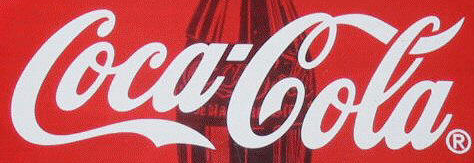
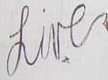
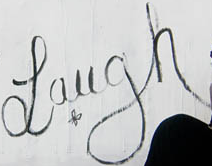
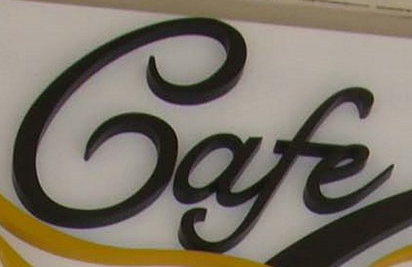
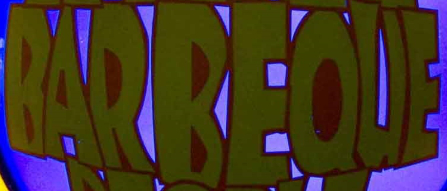
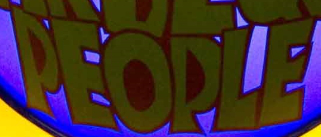
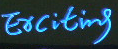
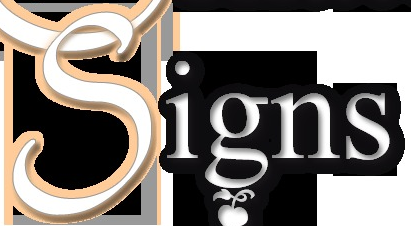
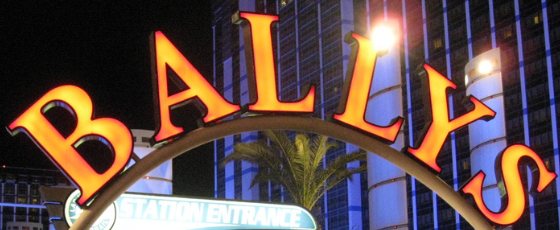
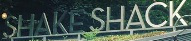

In [5]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))